# Data Cleaning

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
data = {
    'name': ['ju', 'ma', 'lo', 'fi', 'xa', 'pa', 'pe', 'pe', 'jb', 'mp', 'ka', 'te', 'ko'],
    'age': [25, 36, 18, 18, 25, 38, 40, 40, 18, 40, np.nan, 180, 60],
    'time_since_birth': [25, 36, 18, 18, 25, 38, 40, 40, 18, 40, np.nan, np.nan, 60],
    'group': [2, 2, 1, 1, 2, 2, 2, 2, np.nan, np.nan, np.nan, 1, 2],
    'country': ['fr', 'gb', 'gb', 'fr', 'fr', 'es', 'it', 'it', 'gb', 'fr', 'es', 'gb', 'it'],
    'europe': [True, True, True, True, True, True, True, True, True, True, True, True, True],
    'salary': [1800, 3000, 1500, 1500, 1800, 7500, 8000, 8000, np.nan, np.nan, np.nan, 4000, 20000],
    'patrimony': [3000, 7000, 2000, 60000, 8000000, 6000, 4000, 4000, np.nan, np.nan, np.nan, 4000, 7000],
    'weight': [70, np.nan, np.nan, np.nan, np.nan, np.nan, 90, 90, 60, np.nan, np.nan, np.nan, np.nan],
    'size': [175, 180, 150, np.nan, np.nan, 170, 170, 170, np.nan, np.nan, np.nan, 150, 180],
    'comment': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'voted': [True, np.nan, True, np.nan, True, np.nan, True, True, np.nan, np.nan, True, True, True],
}
df = pd.DataFrame(data)

Let's work with this DataFrame for the next few slides

In [29]:
df

,name,age,time_since_birth,group,country,europe,salary,patrimony,weight,size,comment,voted
0,ju,25.0,25.0,2.0,fr,True,1800.0,3000.0,70.0,175.0,NaN,True
1,ma,36.0,36.0,2.0,gb,True,3000.0,7000.0,NaN,180.0,NaN,NaN
2,lo,18.0,18.0,1.0,gb,True,1500.0,2000.0,NaN,150.0,NaN,True
3,fi,18.0,18.0,1.0,fr,True,1500.0,60000.0,NaN,NaN,NaN,NaN
4,xa,25.0,25.0,2.0,fr,True,1800.0,8000000.0,NaN,NaN,NaN,True
5,pa,38.0,38.0,2.0,es,True,7500.0,6000.0,NaN,170.0,NaN,NaN
6,pe,40.0,40.0,2.0,it,True,8000.0,4000.0,90.0,170.0,NaN,True
7,pe,40.0,40.0,2.0,it,True,8000.0,4000.0,90.0,170.0,NaN,True
8,jb,18.0,18.0,NaN,gb,True,NaN,NaN,60.0,NaN,NaN,NaN
9,mp,40.0,40.0,NaN,fr,True,NaN,NaN,NaN,NaN,NaN,NaN


- *europe* is constant: must be dropped
- *time_since_birth* duplicate of *age*: must be dropped
- *weight* has mostly NAs, could be dropped
- *comment* has only NA values: must be dropped
- *group* has NA values: it is possible to perfectly reconstruct the values here
- *patrimony* has NA values: this will require a regression for getting an approximate reconstruction

## Select features
(variables / columns)

### Drop constant features

<img src="images/illustrations/data_cleaning_constant.png" width=260 height=260 />

In [30]:
df.nunique(dropna=False)

name                12
age                  8
time_since_birth     7
group                3
country              4
europe               1
salary               8
patrimony            8
weight               4
size                 5
comment              1
voted                2
dtype: int64

In [31]:
# Detect columns with a constant value
const_col = df.nunique(dropna=False) == 1
const_col

name                False
age                 False
time_since_birth    False
group               False
country             False
europe               True
salary              False
patrimony           False
weight              False
size                False
comment              True
voted               False
dtype: bool

In [32]:
# Drop these constant columns
# To drop all:
#df = df.T[~const_col].T
df = df.drop(columns='europe')
df

,name,age,time_since_birth,group,country,salary,patrimony,weight,size,comment,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,70.0,175.0,NaN,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,NaN,180.0,NaN,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,NaN,150.0,NaN,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,NaN,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,NaN,170.0,NaN,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,NaN,True
7,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,NaN,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,60.0,NaN,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN,NaN,NaN


### Drop duplicated columns

In [33]:
# See which column values are duplicated by transposing the matrix
dup_cols = df.T.duplicated()
dup_cols

name                False
age                 False
time_since_birth    False
group               False
country             False
salary              False
patrimony           False
weight              False
size                False
comment             False
voted               False
dtype: bool

In [34]:
# Drop these duplicated columns by transposing the cleaned DataFrame
df = df.T.drop_duplicates().T
df

,name,age,time_since_birth,group,country,salary,patrimony,weight,size,comment,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,70.0,175.0,NaN,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,NaN,180.0,NaN,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,NaN,150.0,NaN,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,NaN,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,NaN,170.0,NaN,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,NaN,True
7,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,NaN,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,60.0,NaN,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN,NaN,NaN


### Drop columns with excessive proportion of missing values

In [35]:
# Great package for missing values analysis
import missingno

<AxesSubplot:>

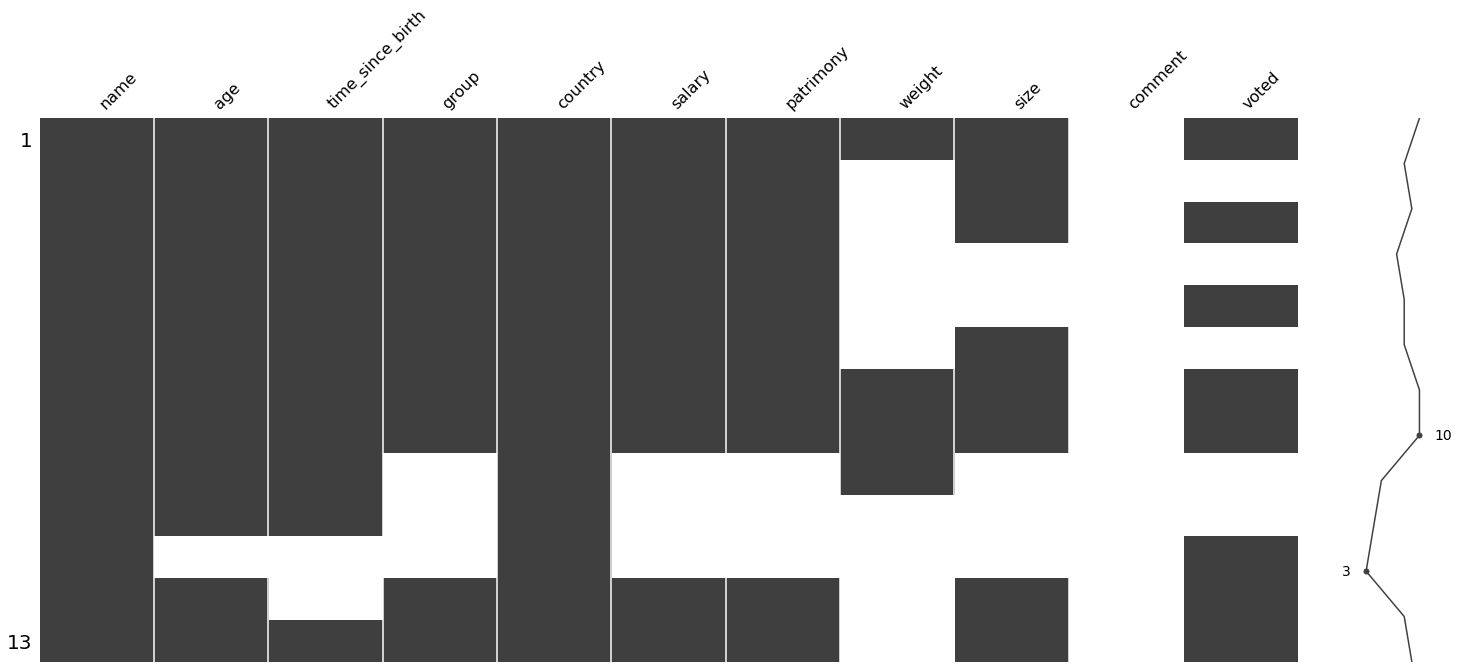

In [36]:
missingno.matrix(df)

#### Column containing only missing values (NA)

In [37]:
# See which columns have only NA values
df.isna().all()

name                False
age                 False
time_since_birth    False
group               False
country             False
salary              False
patrimony           False
weight              False
size                False
comment              True
voted               False
dtype: bool

In [38]:
# Drop columns with only NA values
df.dropna(axis=1, how='all', inplace=True)
df

,name,age,time_since_birth,group,country,salary,patrimony,weight,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,70.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,NaN,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,NaN,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,NaN,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,True
7,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,60.0,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN,NaN


#### Excessive proportion of missing values

In [39]:
df.isna().mean()

name                0.000000
age                 0.076923
time_since_birth    0.153846
group               0.230769
country             0.000000
salary              0.230769
patrimony           0.230769
weight              0.692308
size                0.384615
voted               0.384615
dtype: float64

In [40]:
# Create a mask for columns with more than 50% of NAs
excessive_na = df.isna().mean() > .5
excessive_na

name                False
age                 False
time_since_birth    False
group               False
country             False
salary              False
patrimony           False
weight               True
size                False
voted               False
dtype: bool

In [41]:
# Drop these columns
df = df.T[~excessive_na].T
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
7,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN


### Excessive correlation between features

In [42]:
df_no_missing_values = df.fillna(method='bfill')   # Don't replace NA like this, just for the example
correlation_matrix = df_no_missing_values.corr()
corr_matrix_clean = (correlation_matrix*100).round(2)
corr_matrix_clean

,age,time_since_birth,group,salary,patrimony,size,voted
age,100.00,79.84,-34.76,6.83,-16.18,-42.04,NaN
time_since_birth,79.84,100.00,6.73,57.83,-22.65,-3.34,NaN
group,-34.76,6.73,100.00,41.35,26.56,85.92,NaN
salary,6.83,57.83,41.35,100.00,-21.23,39.17,NaN
patrimony,-16.18,-22.65,26.56,-21.23,100.00,14.33,NaN
size,-42.04,-3.34,85.92,39.17,14.33,100.00,NaN
voted,NaN,NaN,NaN,NaN,NaN,NaN,NaN


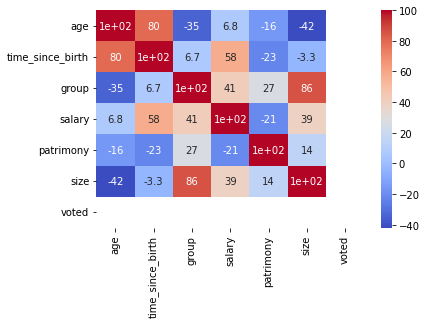

In [43]:
sns.heatmap(corr_matrix_clean, cmap='coolwarm', annot=True)
None

- Diagonal has no meaning in the reading of a correlation matrix
- Values above +60 (or under -60%) start to be annoying (60% of information is redundant)
- Here: group has a high correlation with both age (+76%) and size (+95%)
- If used in a model*, the "group" variable should be dropped (otherwise it can be useful)

\* The problem in a model is the over-representation of a same information. Leading to bias, decreased performance on out-of-sample (real life) data.

## Drop poor rows

### Drop duplicates

In [44]:
# See which row values are duplicated
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
dtype: bool

In [45]:
# Drop these duplicated rows
df.drop_duplicates(inplace=True)
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN
10,ka,NaN,NaN,NaN,es,NaN,NaN,NaN,True


### Drop rows with excessing NA proportion

In [46]:
df.T.isna().mean()

0     0.000000
1     0.111111
2     0.000000
3     0.222222
4     0.111111
5     0.111111
6     0.000000
8     0.555556
9     0.555556
10    0.666667
11    0.111111
12    0.000000
dtype: float64

In [47]:
# Create a mask for rows with more than 50% of NAs
excessive_na = df.T.isna().mean() > .5
excessive_na

0     False
1     False
2     False
3     False
4     False
5     False
6     False
8      True
9      True
10     True
11    False
12    False
dtype: bool

In [48]:
# Drop these columns
df = df[~excessive_na]
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True
12,ko,60.0,60.0,2.0,it,20000.0,7000.0,180.0,True


## Impute NAs
(replace missing values)

### Missing can be the information
Ask if someone is sleeping, if there is no answer (np.nan), it means yes.

In [49]:
# Filter rows with NA
rows_with_na = df.isna().any(axis=1)
df[rows_with_na]

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,NaN
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,NaN
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True


In [50]:
df['voted'].value_counts()

True    6
Name: voted, dtype: int64

- *voted* contains only *True* and *Nan* values.
- Thus *Nan* might here be replaced by *False*.
- In this case the missing value is an actual information

In [51]:
# Replace Nan by False (in 'voted' variable only)
df.loc[df['voted'].isna(), 'voted'] = False
None

/var/folders/ly/0t39j74s7r5cxc2_d72q_qg00000gn/T/ipykernel_7378/3157958987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['voted'].isna(), 'voted'] = False


In [52]:
# Check result of NA imputation
df['voted'].value_counts()

True     6
False    3
Name: voted, dtype: int64

### Standard reconstruction methods

#### Constant value
- average
- median

In [53]:
remaining_na_rows = df.isna().any(axis=1)
df[remaining_na_rows]

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,False
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True


In [54]:
size_mean = df['size'].mean()
size_median = df['size'].median()
print(size_mean)
print(size_median)

167.85714285714286
170.0


In [55]:
# Replace Nan by the mean
df['size'].fillna(size_mean)

0     175.000000
1     180.000000
2     150.000000
3     167.857143
4     167.857143
5     170.000000
6     170.000000
11    150.000000
12    180.000000
Name: size, dtype: float64

In [56]:
# Apply the modification on the actual DataFrame
# df['size'] =  df['size'].fillna(size_mean)

#### Forward, backward fill

Forward Fill

In [57]:
df['size'].fillna(method='ffill')

0     175.0
1     180.0
2     150.0
3     150.0
4     150.0
5     170.0
6     170.0
11    150.0
12    180.0
Name: size, dtype: float64

- Line 4 is replaced by 190
- The previous value (row 3 at 190) has been forwarded

Backward Fill

In [58]:
df['size'].fillna(method='bfill')

0     175.0
1     180.0
2     150.0
3     170.0
4     170.0
5     170.0
6     170.0
11    150.0
12    180.0
Name: size, dtype: float64

- Line 4 is replaced by 170
- The next value (row 5) has been backwarded

### Advanced reconstruction methods


In [59]:
# Cast variables by their current clean type before using advanced imputing methods
# Otherwise, many columns are of "object" type, and block some simple computations
df = df.infer_objects()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 12
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              9 non-null      object 
 1   age               9 non-null      float64
 2   time_since_birth  8 non-null      float64
 3   group             9 non-null      float64
 4   country           9 non-null      object 
 5   salary            9 non-null      float64
 6   patrimony         9 non-null      float64
 7   size              7 non-null      float64
 8   voted             9 non-null      bool   
dtypes: bool(1), float64(6), object(2)
memory usage: 657.0+ bytes


The types are correctly casted:
- numerical variables are of "float" type
- voted is a boolean
- name and country are strings (can only be object for a DataFrame)

#### Groupby

In [60]:
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,False
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,False
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,False
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True
12,ko,60.0,60.0,2.0,it,20000.0,7000.0,180.0,True


- Previously, we saw that age and size are correlated (+71%)
- See that *'xa'* is 25 years old, like *'ju'*
- Could be great to get the same size no?
- Let's group by *age* to impute *size* Nan


In [61]:
df_mean_by_age = df.groupby('age').mean()
df_mean_by_age

,time_since_birth,group,salary,patrimony,size,voted
age,,,,,,
18.0,18.0,1.0,1500.0,31000.0,150.0,0.5
25.0,25.0,2.0,1800.0,4001500.0,175.0,1.0
36.0,36.0,2.0,3000.0,7000.0,180.0,0.0
38.0,38.0,2.0,7500.0,6000.0,170.0,0.0
40.0,40.0,2.0,8000.0,4000.0,170.0,1.0
60.0,60.0,2.0,20000.0,7000.0,180.0,1.0
180.0,NaN,1.0,4000.0,4000.0,150.0,1.0


In [62]:
nan_age = df[remaining_na_rows]['age']
nan_size_to_impute = df_mean_by_age.loc[nan_age]['size']
nan_size_to_impute

age
18.0     150.0
25.0     175.0
180.0    150.0
Name: size, dtype: float64

In [63]:
df.fillna(df.groupby('age').transform('mean'))

/var/folders/ly/0t39j74s7r5cxc2_d72q_qg00000gn/T/ipykernel_7378/3563483188.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.fillna(df.groupby('age').transform('mean'))
/var/folders/ly/0t39j74s7r5cxc2_d72q_qg00000gn/T/ipykernel_7378/3563483188.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.fillna(df.groupby('age').transform('mean'))


,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,False
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,150.0,False
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,175.0,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,False
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True
12,ko,60.0,60.0,2.0,it,20000.0,7000.0,180.0,True


#### Models

- Impute using automatic methods that take into account more complex patterns
    - Unsupervised models to create smart grouping
    - Supervised models (built for the purpose of imputation: KnnImputer, any other model)

In [64]:
df._get_numeric_data()

,age,time_since_birth,group,salary,patrimony,size,voted
0,25.0,25.0,2.0,1800.0,3000.0,175.0,True
1,36.0,36.0,2.0,3000.0,7000.0,180.0,False
2,18.0,18.0,1.0,1500.0,2000.0,150.0,True
3,18.0,18.0,1.0,1500.0,60000.0,NaN,False
4,25.0,25.0,2.0,1800.0,8000000.0,NaN,True
5,38.0,38.0,2.0,7500.0,6000.0,170.0,False
6,40.0,40.0,2.0,8000.0,4000.0,170.0,True
11,180.0,NaN,1.0,4000.0,4000.0,150.0,True
12,60.0,60.0,2.0,20000.0,7000.0,180.0,True


Interpolate missing data

<img src="images/illustrations/data_cleaning_na_imputation_interpolate.png" width=560 height=560 />

In [65]:
from sklearn.impute import KNNImputer

In [66]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
na_prediction = imputer.fit_transform(df._get_numeric_data())
df_filled = pd.DataFrame(na_prediction, columns=df._get_numeric_data().columns)
df_filled

,age,time_since_birth,group,salary,patrimony,size,voted
0,25.0,25.0,2.0,1800.0,3000.0,175.0,1.0
1,36.0,36.0,2.0,3000.0,7000.0,180.0,0.0
2,18.0,18.0,1.0,1500.0,2000.0,150.0,1.0
3,18.0,18.0,1.0,1500.0,60000.0,175.0,0.0
4,25.0,25.0,2.0,1800.0,8000000.0,180.0,1.0
5,38.0,38.0,2.0,7500.0,6000.0,170.0,0.0
6,40.0,40.0,2.0,8000.0,4000.0,170.0,1.0
7,180.0,30.5,1.0,4000.0,4000.0,150.0,1.0
8,60.0,60.0,2.0,20000.0,7000.0,180.0,1.0


In [67]:
df['size'] = df_filled['size']

In [68]:
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,False
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,175.0,False
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,180.0,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,False
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,NaN,True
12,ko,60.0,60.0,2.0,it,20000.0,7000.0,NaN,True


## Drop outliers

### Abberations to delete

See the distribution

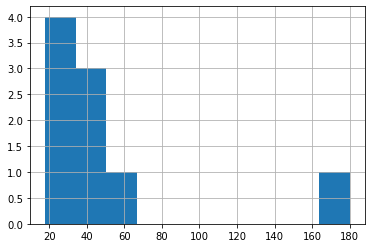

In [69]:
df['age'].hist()
None

Seaborn boxplots detect outliers (using IQR - Interquartile range)

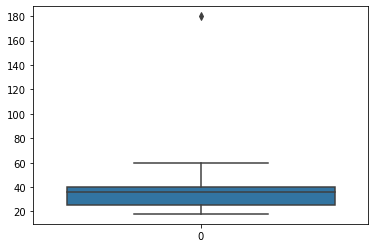

In [70]:
sns.boxplot(data=df['age'], orient='v')
None

- Quantitative method: One individual is detected as outlier (extremely positive value)
- Domain expertise: It is general knowledge that no one is 180 years old
- Conclusion: this should be deleted as it misleads the computations

In [71]:
ma_180_yo = df['age'] == 180
ma_180_yo

0     False
1     False
2     False
3     False
4     False
5     False
6     False
11     True
12    False
Name: age, dtype: bool

In [72]:
df.drop(df.loc[ma_180_yo].index, inplace=True)

### Extreme values to keep

See the histogram

<AxesSubplot:>

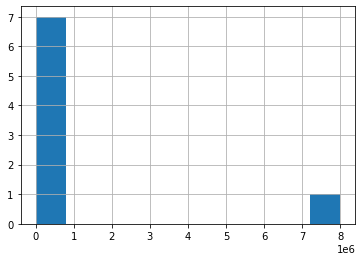

In [73]:
df['patrimony'].hist()

Display the boxplot

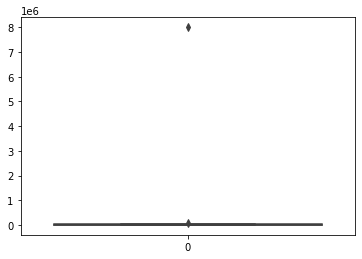

In [74]:
sns.boxplot(data=df['patrimony'], orient='v')
None

- Quantitative method: One individual is detected as outlier (extremely positive value)
- Domain expertise: It is general knowledge that richest people possess billions
- Conclusion:
    - For analysis purpose this individual (row) should not be deleted
    - To train a model this individual should (often) be deleted as it differs greatly from the remaining data. Many models would be incapable to understand the data (like a linear regression). The model performance would be disastrous

### Variables to transform

#### Logarithm for exponential and power variables

<AxesSubplot:>

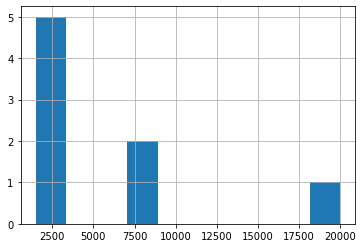

In [75]:
df['salary'].hist()

In [76]:
# Add log salary to DataFrame
df['salary_log'] = np.log(df['salary'])

<AxesSubplot:>

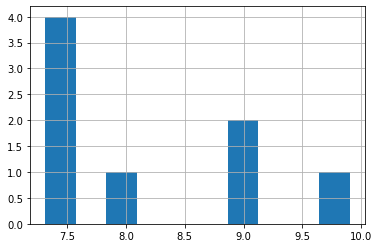

In [77]:
df['salary_log'].hist()

- There are no more extreme values in *salary_log*
- Relations are easier to understand for many models when the distribution is closer to a normal law
- It is however more difficult to interpret as a human

#### Center and reduce

Many models work better with centered and reduced data. It is due to several artifacts and as stated above, models work better with data that more closely ressemble to a normal distribution.


Center and reduce:
- Center: transform data to get average = 0
- Reduce: transform data to get variance = 0

See distribution of *age*

<AxesSubplot:>

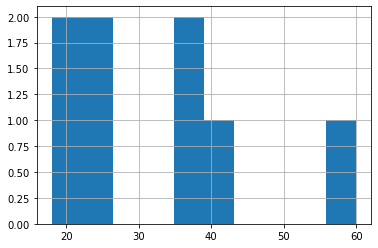

In [78]:
df['age'].hist()

Center *age*

In [79]:
age_centered = df['age'] - df['age'].mean()
age_centered

0     -7.5
1      3.5
2    -14.5
3    -14.5
4     -7.5
5      5.5
6      7.5
12    27.5
Name: age, dtype: float64

In [80]:
age_centered.mean()

0.0

Reduce *age*

In [81]:
age_centered_reduced = age_centered / age_centered.std() 
age_centered_reduced

0    -0.532618
1     0.248555
2    -1.029727
3    -1.029727
4    -0.532618
5     0.390586
6     0.532618
12    1.952931
Name: age, dtype: float64

In [82]:
age_centered_reduced.std()

1.0

See centered and recuded histogram of *age*

<AxesSubplot:>

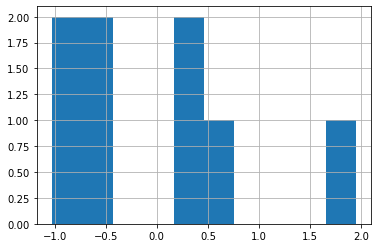

In [83]:
age_centered_reduced.hist()

## Merge DataFrames

### Merging on a primary key column

#### Merging methods: Outer, Left, Right, Inner

When discovering a dataset, always use *outer* (with indicator=True). This will shoud you all the missing correspondances in the left or right data set (left is the dataset you provide as first argument in pd.merge, right is the dataset you provide as second arguemnt).

You can then drop the column *"_merge"* once you treated properly all the NAs (imputed, dropped).

Left, right and inner are mostly for production purpose (when you already know your data and you don't want problems to propagate).

Let's play with a simple data set

In [84]:
t1 = pd.DataFrame({'a':[1, 2, 3, 3, 3, 3, 3, 3], 'b': [10, 600, 20, 30, 40, 50, 60, 70]})
t2 = pd.DataFrame({'a':[1, 3, 4], 'c': [100, 300, 6000]})

In [85]:
t1

,a,b
0,1,10
1,2,600
2,3,20
3,3,30
4,3,40
5,3,50
6,3,60
7,3,70


In [86]:
t2

,a,c
0,1,100
1,3,300
2,4,6000


Merge using **outer** method

In [87]:
pd.merge(t1, t2, how='outer', on='a', indicator=True)

,a,b,c,_merge
0,1,10.0,100.0,both
1,2,600.0,NaN,left_only
2,3,20.0,300.0,both
3,3,30.0,300.0,both
4,3,40.0,300.0,both
5,3,50.0,300.0,both
6,3,60.0,300.0,both
7,3,70.0,300.0,both
8,4,NaN,6000.0,right_only


- The primary value *a=2* does not exist in the right table
    - the value is kept from the left table only
    - which creates a NaN in column *c* (originally on left table)
- The primary value *a=4* does not exist in the left table
    - the value is kept from the right table only
    - which creates a NaN in column *b* (originally on right table)

Merge using **left** method

In [88]:
pd.merge(t1, t2, how='left', on='a', indicator=True)

,a,b,c,_merge
0,1,10,100.0,both
1,2,600,NaN,left_only
2,3,20,300.0,both
3,3,30,300.0,both
4,3,40,300.0,both
5,3,50,300.0,both
6,3,60,300.0,both
7,3,70,300.0,both


- the primary value *a=2* does not exist in the right table
    - the value is kept from the left table only
    - which creates a NaN in column *c* (column originally of the left table)
- primary keys present in the right table and not in the left table have been dropped
    - we would not be aware of that missing key if *outer* woud have not been used before

Merge using **right** method

In [89]:
pd.merge(t1, t2, how='right', on='a', indicator=True)

,a,b,c,_merge
0,1,10.0,100,both
1,3,20.0,300,both
2,3,30.0,300,both
3,3,40.0,300,both
4,3,50.0,300,both
5,3,60.0,300,both
6,3,70.0,300,both
7,4,NaN,6000,right_only


- the primary value *a=4* does not exist in the left table
    - the value is kept from the right table only
    - which creates a NaN in column *b* (column originally of the right table)
- primary keys present in the left table and not in the right table have been dropped
    - we would not be aware of that missing key if *outer* woud have not been used before

Merge using **inner** method

In [90]:
pd.merge(t1, t2, how='inner', on='a', indicator=True)

,a,b,c,_merge
0,1,10,100,both
1,3,20,300,both
2,3,30,300,both
3,3,40,300,both
4,3,50,300,both
5,3,60,300,both
6,3,70,300,both


- The inner merge help us see nothing
- there is no NaN created, because any missing correspondance has been deleted

### Concatenation (stack DataFrames)

#### Vertically
Same column names

In [91]:
t1 = pd.DataFrame({'a':[1, 2, 3, 3, 3, 3, 3, 3], 'b': [10, 600, 20, 30, 40, 50, 60, 70]})
t3 = pd.DataFrame({'a':[10, 20, 30, 30, 30, 30, 30, 30], 'b': [10, 600, 20, 30, 40, 50, 60, 70]})

In [92]:
pd.concat([t1, t3], ignore_index=True, axis=0)

,a,b
0,1,10
1,2,600
2,3,20
3,3,30
4,3,40
5,3,50
6,3,60
7,3,70
8,10,10
9,20,600


#### Horizontally
Different column names, same number of rows

In [93]:
t2 = pd.DataFrame({'a':[1, 3, 4], 'c': [100, 300, 6000]})
t4 = pd.DataFrame({'d':[10, 30, 40], 'e': [200, 800, 9000], 'f': ['a', 'b', 'c']})

In [94]:
pd.concat([t2, t4], axis=1, ignore_index=True)

,0,1,2,3,4
0,1,100,10,200,a
1,3,300,30,800,b
2,4,6000,40,9000,c


## Feature Engineering

### Qualitative variables
(categories): one-hot encode

#### One-hot encode
The one-hot-encoding means transforming each category of a variable into a boolean column (vector of 0 and 1)

The goals are to:
- provide numerical data to the models (0 and 1)
- while conserving the information
- while preventing to infer wrong information

Let's create a toy DataFrame with a qualitative variable (contains categories / modalities)

In [95]:
df_encode = pd.DataFrame(
    {
        'colors': [
        'blue',
        'red',
        'blue',
        'blue',
        'red',
        'white',
        'blue',
        'white']
    }
)

One-hot encode it

In [96]:
dummies = pd.get_dummies(df_encode['colors'])
dummies

,blue,red,white
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,0,1
6,1,0,0
7,0,0,1


Let's concatenate with the original data

In [97]:
pd.concat([df_encode, dummies], axis=1)

,colors,blue,red,white
0,blue,1,0,0
1,red,0,1,0
2,blue,1,0,0
3,blue,1,0,0
4,red,0,1,0
5,white,0,0,1
6,blue,1,0,0
7,white,0,0,1


- There are 3 columns
    - 1 column for the blue modality
    - 1 column for the red modality
    - 1 column for the white modality
- For each row, the column corresponding to the modality is set to 1, the others to 0

Why is it preventing to infer wrong information?

Let's see what happens when replacing directly the modalities by numers in the original column

In [98]:
numeric_groups = df_encode['colors'].replace({'blue': 0, 'red': 1, 'white': 2})
numeric_groups

0    0
1    1
2    0
3    0
4    1
5    2
6    0
7    2
Name: colors, dtype: int64

Most models would understand that a linear relation exist between 0, 1 and 2:
- orginality: 0 < 1 < 2
- cardinality: 2 = 2 * 1
- both of which are wrong
    - white = white * red makes no sense
    - blue < red < white makes no sense

Providing that wrong information to a model would lead to a model learning false relations, thus being poor on out-of-sample (real life) data

Let's say the data provided from the beginning is in numerical format, although you know it represents categories.

In [99]:
numeric_groups

0    0
1    1
2    0
3    0
4    1
5    2
6    0
7    2
Name: colors, dtype: int64

It is important to one-hot encode that data even if you don't have the columns labels

In [100]:
pd.get_dummies(numeric_groups)

,0,1,2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,0,1
6,1,0,0
7,0,0,1


### Quantitative variables
(numbers representing quantities): create groups

A reduced set of categories is prefered in many use-cases as it reduces the complexity:
- easier to understand
- easier to explain
- easier to maintain

Let's assume a dataset with a lot of different values

In [101]:
clients_age = pd.DataFrame({'clients_age': np.random.randint(low=10, high=70, size=100)})
print(f'Number of unique values: {clients_age.nunique()[0]}')
clients_age

Number of unique values: 48


,clients_age
0,35
1,68
2,22
3,21
4,16
...,...
95,31
96,49
97,33
98,11


See the histogram

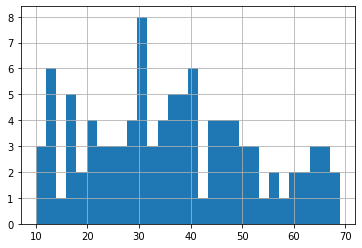

In [102]:
clients_age['clients_age'].hist(bins=30)
None

The histogram is difficult to exploit for business purpose (it is hard to create 50 different marketing strategies better have 3-5 personas)


It is possible to group visually on hist, by using bins (the number of bars)

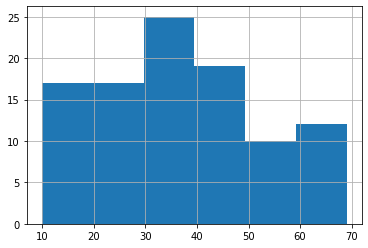

In [103]:
clients_age['clients_age'].hist(bins=6)
None

Another option is to group using *value_counts*

In [104]:
clients_age['clients_age'].value_counts().head(7)

31    6
38    5
35    4
49    4
17    4
21    4
40    4
Name: clients_age, dtype: int64

It is then possible to display the information in a pie chart

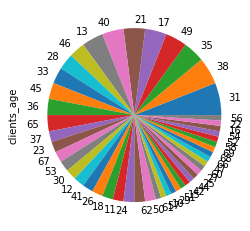

In [105]:
clients_age['clients_age'].value_counts().plot.pie()
None

- However, this pie chart is almost impossible to exploit
- Only conclusion is: there are many categories

Let's define how to group ages

In [106]:
def group_age(age):
    """ Group ages by logical business interest """
    if age < 18:
        return 18
    if age < 25:
        return 25
    if age < 35:
        return 35
    if age < 50:
        return 50
    if age >= 50:
        return 60

Use 'apply' to apply the function on the Series

In [107]:
clients_age_grouped = clients_age['clients_age'].apply(group_age)
clients_age_grouped

0     50
1     60
2     25
3     25
4     18
      ..
95    35
96    50
97    35
98    18
99    35
Name: clients_age, Length: 100, dtype: int64

Show the resulting histogram

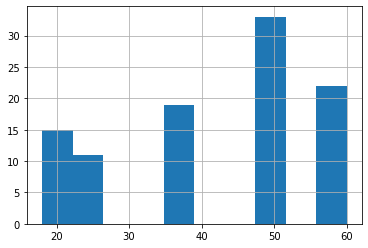

In [108]:
clients_age_grouped.hist()
None

- The bars height is highly dependant of the range between groups
    - If the range is large, a great number of individuals will be contained in that range
    - The bar will be tall

See the new *value_counts* and respective pie chart

In [109]:
clients_age_grouped.value_counts()

50    33
60    22
35    19
18    15
25    11
Name: clients_age, dtype: int64

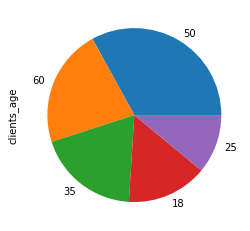

In [110]:
clients_age_grouped.value_counts().plot.pie()
None

- With a reasonable number of categories it is easier to interpret
- Other applications however need to maintain a large number of values (do what is best adapted to the situation)

#### Filter out modalities

Since one goal is to have the best model in out-of-sample data, deleting modalities can help the model to better learn (by reducing the complexity of the information).

Let's create a specific data set

In [111]:
clients_location = pd.DataFrame(
    {
        'cities': ['a', 'b', 'c', 'd', 'e', 'f'],
        'number_of_clients': [20, 5000, 12000, 3, 45000, 7000],
    }
)

clients_location

,cities,number_of_clients
0,a,20
1,b,5000
2,c,12000
3,d,3
4,e,45000
5,f,7000


Visualize categories on pie chart

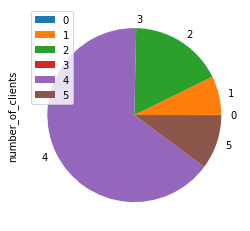

In [112]:
clients_location.plot.pie(y='number_of_clients')
None

- See how the blue (0) and red (3) are not visible on the pie chart
- If these clients all spend a similar amount, the cities with few clients are of few to no interest

Let's delete these unimportant modalities

In [113]:
ma_small = clients_location['number_of_clients'] < 1000
ma_small

0     True
1    False
2    False
3     True
4    False
5    False
Name: number_of_clients, dtype: bool

In [114]:
clients_location[~ma_small]

,cities,number_of_clients
1,b,5000
2,c,12000
4,e,45000
5,f,7000


- A business might better be interested in these data
- A model will learn more easily the relation between variables if there the problem is more simple:
    - there are less modalities / unique values
    - the are less noise

- Very often when you work with geographical data you obtain to many modalities when transforming qualitative variables using one-hot encoding method
- It is thus necessary to reduce their number by deleting the modalities of least interest
- Maintaining a lot of columns after one-hot encode would:
    - make it more difficult for the model to undersand the principal relations in the data
    - over represent the information (of the city for example). Since one column have been replaced by many.